<a href="https://colab.research.google.com/github/majavk/HPV-prediction/blob/main/HPV_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HPV prediction

HPV dataset was taken from EFOMP online course: AI in Medical Physics.

## Set-up

In [ ]:
import numpy as np            #for manipulating vectors
import pandas as pd           #per manipulating dataframes

# graphs, figures

import matplotlib.pyplot as plt #for plots
import seaborn as sns # for confusion matrix figures

#machine learning tools

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier        # ensemble machine learning model with bagging
import xgboost as xgb      # import XGBoostClassifier, ensemble machine learning model with boosting 
from sklearn.svm import SVC #support vector machines
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.decomposition import PCA

from sklearn import feature_selection #various feature selection
import collections
from imblearn.over_sampling import SMOTE # SMOTE oversampling

# tools for assessing the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc # tools to evaluate  your model performance
from sklearn.model_selection import train_test_split, cross_val_score, KFold,cross_val_predict, GridSearchCV   # other tools for model performance, specific for cross-validation
from sklearn.model_selection import cross_val_score
import time





## Data

In [ ]:
            
dataset='HPV'

Y = data['outcome']       
X = data.drop('outcome', axis=1)   
np.mean(Y), np.mean(1-Y)

(0.568870523415978, 0.43112947658402206)

In [ ]:
X.head()

,SmoothThreshBD_NGTDM_Busyness,SmoothThreshBD_NGTDM_Coarseness,SmoothThreshBD_NGTDM_Contrast,SmoothThreshBD_IH_GlobalMin,SmoothThreshBD_IH_Kurtosis,SmoothThreshBD_GLCM_DifferenceEntropy,SmoothThresh_IH_GlobalEntropy,SmoothThresh_IH_GlobalUniformity,SmoothThresh_IH_Skewness,SmoothThresh_GLCM_ClusterProminence,...,Thresh_GLCM_Variance,Thresh_GLRLM_HighGrayLevelRunEmpha,Thresh_GLRLM_LongRunEmphasis,Thresh_GLRLM_LongRunLowGrayLevelEmpha,Thresh_GLRLM_LowGrayLevelRunEmpha,Thresh_GLRLM_RunLengthNonuniformity,Thresh_GLRLM_RunPercentage,Thresh_GLRLM_ShortRunEmphasis,Thresh_GLRLM_ShortRunHighGrayLevelEmpha,Shape_Volume
0,0.001009,2.607566,0.013772,57,14.717570,1.479184,2.233362,0.281025,-1.859840,1.019148e+07,...,1061.680,1117511,1.076487,9.640000e-07,8.960000e-07,0.931117,0.975908,0.982227,1097452.0,4.976946
1,0.000557,2.130579,0.009728,57,73.478610,1.557858,2.556784,0.242537,6.154925,2.500000e+09,...,5611.668,1162090,1.087674,9.420000e-07,8.660000e-07,0.920367,0.972286,0.979283,1138080.0,24.312710
2,0.000275,2.096032,0.005328,58,14.911760,1.446220,2.361069,0.278380,-0.582550,5.161296e+07,...,2240.810,1140094,1.131667,9.940000e-07,8.800000e-07,0.883602,0.959041,0.969051,1104457.0,14.112180
3,0.000227,2.621198,0.005539,57,9.671991,1.412020,2.816237,0.190629,-1.743020,1.010000e+08,...,3352.268,1205529,1.151851,9.570000e-07,8.330000e-07,0.870631,0.953730,0.965461,1163426.0,35.633680
4,0.000626,1.700127,0.022274,57,4.308691,1.860631,3.224254,0.132974,-0.766570,6.923101e+07,...,4602.059,1151931,1.064036,9.280000e-07,8.730000e-07,0.940671,0.979528,0.984734,1134047.0,5.502731


In [26]:
# split the dataset into train and test datasets and check if your dataset is balanced
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

print("Train set without SMOTE: ", collections.Counter(Y_train))

sm = SMOTE(random_state=15);stringSMOTE='no'

# SMOTE oversampling, even though the dataset is not disbalanced, this is attempt to improve the recall.

X_train, Y_train = sm.fit_resample(X_train, Y_train);print("Train set with SMOTE: ", collections.Counter(Y_train))

Train set without SMOTE:  Counter({1: 288, 0: 220})
Train set with SMOTE:  Counter({1: 288, 0: 288})


In [27]:
collections.Counter(Y_train)

Counter({1: 288, 0: 288})

In [28]:
X_train.shape

(576, 49)

## Machine Learning Pipeline

In [51]:
pca = PCA()
clf = DecisionTreeClassifier() 
#feature selection
f5 = SelectFromModel(estimator=RandomForestClassifier())  # selects features according to importance, requires classifier estimating importance
pipe = Pipeline([('pca', pca),('FS', f5),('clf', clf)])

In [52]:
print(pipe.get_params().keys())         # let's have a look to the hyperparameters in the pipeline

dict_keys(['memory', 'steps', 'verbose', 'pca', 'FS', 'clf', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'FS__estimator__bootstrap', 'FS__estimator__ccp_alpha', 'FS__estimator__class_weight', 'FS__estimator__criterion', 'FS__estimator__max_depth', 'FS__estimator__max_features', 'FS__estimator__max_leaf_nodes', 'FS__estimator__max_samples', 'FS__estimator__min_impurity_decrease', 'FS__estimator__min_samples_leaf', 'FS__estimator__min_samples_split', 'FS__estimator__min_weight_fraction_leaf', 'FS__estimator__n_estimators', 'FS__estimator__n_jobs', 'FS__estimator__oob_score', 'FS__estimator__random_state', 'FS__estimator__verbose', 'FS__estimator__warm_start', 'FS__estimator', 'FS__importance_getter', 'FS__max_features', 'FS__norm_order', 'FS__prefit', 'FS__threshold', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__min_impurity_decre

In [53]:
# search for best performing hyperparameters:

param_grid_fs = {'FS__n_features_to_select': [3,5,10,16,30]};           
if f5.__class__.__name__=='SelectFromModel':param_grid_fs = {'FS__max_features': [3,5,10,16,30]}      #for SelectFromModel use 'FS__max_features'
param_grid_clf ={'clf__max_depth':[3,5,10,16]}
if clf.__class__.__name__=='SVC': param_grid_clf = {'clf__C' : [0.5,1.0]}
if clf.__class__.__name__=='MLPClassifier': param_grid_clf = {'clf__hidden_layer_sizes': [(20,20)],'clf__activation': ['relu','logistic'],'clf__nesterovs_momentum': [True], 'clf__max_iter':[1000], 
                                                              'clf__learning_rate':['adaptive'], 'clf__shuffle':[True]};



param_grid = {**param_grid_fs, **param_grid_clf}

print(param_grid) 

{'FS__max_features': [3, 5, 10, 16, 30], 'clf__max_depth': [3, 5, 10, 16]}


In [54]:
t1 = time.perf_counter()  

# search the set of hyperparameters providing the best result in 5-fold cross-validation 
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, verbose=2) #define a search strategy
rf_fit=search.fit(X_train, Y_train)

print(search.best_params_)

t2 = time.perf_counter(); print('time taken to run:',t2-t1)

rf_fit.best_estimator_

print(t2-t1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'FS__max_features': 3, 'clf__max_depth': 3}
time taken to run: 19.511962013999437
19.511962013999437


In [55]:
print(search.best_params_)

{'FS__max_features': 3, 'clf__max_depth': 3}


## Model evaluation

Accuracy: 0.619
Precision: 0.662
Recall (also termed sensitivity): 0.688
Specificity (=recall of negative): 0.527


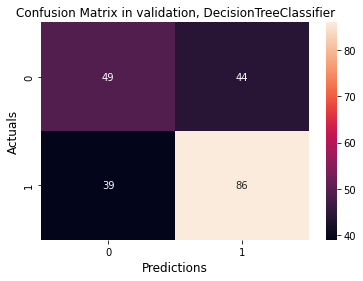

In [56]:
predictions = rf_fit.predict(X_test)

com = confusion_matrix(Y_test,predictions)
sns.heatmap(com,annot=True,fmt="d")
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix in validation, '+clf.__class__.__name__, fontsize=12)

print('Accuracy: %.3f' % accuracy_score(Y_test,predictions))
print('Precision: %.3f' % precision_score(Y_test, predictions))
print('Recall (also termed sensitivity): %.3f' % recall_score(Y_test, predictions))
print('Specificity (=recall of negative): %.3f' % recall_score(Y_test, predictions,pos_label=0))

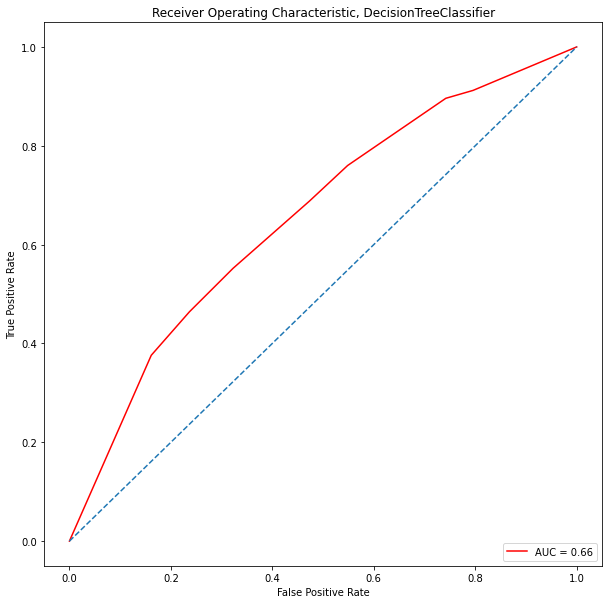

In [57]:

if clf.__class__.__name__!='SVC' and clf.__class__.__name__!='MLPClassifier':
  y_prob = rf_fit.best_estimator_.predict_proba(X_test)
  y_sorted = np.unique(Y)
  indices = np.argmax(y_prob, axis=1)
  
  y_pred = y_sorted[indices]

  y_prob[:,0]

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob[:,1])
  roc_auc = auc(false_positive_rate, true_positive_rate)

  plt.figure(figsize=(10,10));plt.title('Receiver Operating Characteristic, '+clf.__class__.__name__)
  plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight');plt.ylabel('True Positive Rate');plt.xlabel('False Positive Rate')

## Model Interpertability

Index(['SmoothThreshBD_IH_GlobalMin', 'SmoothThreshBD_GLCM_DifferenceEntropy',
       'SmoothThresh_IH_GlobalEntropy'],
      dtype='object')


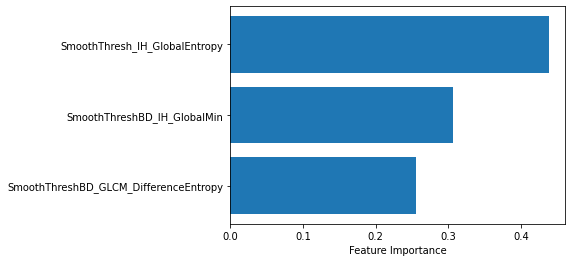

In [58]:
feature_idx =search.best_estimator_.named_steps["FS"].get_support()
feature_name = X_train.columns[feature_idx]
print(feature_name)

if clf.__class__.__name__!='SVC' and clf.__class__.__name__!='MLPClassifier':

  sorted_idx = search.best_estimator_.named_steps["clf"].feature_importances_.argsort()
  plt.barh(feature_name[sorted_idx], search.best_estimator_.named_steps["clf"].feature_importances_[sorted_idx])
  plt.xlabel("Feature Importance");

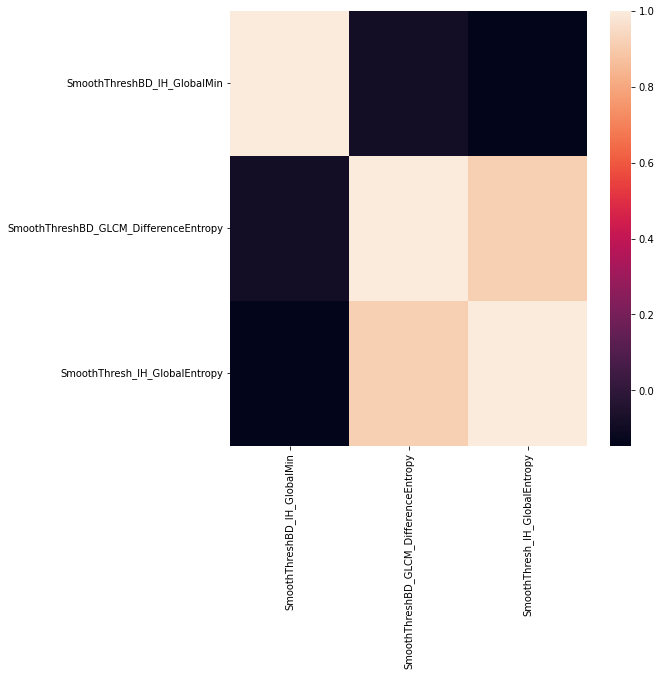

In [59]:
df = pd.DataFrame(X_train,columns=feature_name)
fig = plt.figure(figsize=(8, 8))
dataplot=sns.heatmap(df.corr())
plt.show()

In [60]:
# we use the Wilcoxon rank-sum test to assess if the features are different between positives and negatives

import scipy.stats as stats

stats.mannwhitneyu(df[Y_train==0], df[Y_train==1])

MannwhitneyuResult(statistic=array([42076., 43143., 43902.]), pvalue=array([0.54297846, 0.40288368, 0.2237785 ]))